# Topography generation using the Diamond-Square algorithm

From Wikipedia https://en.wikipedia.org/wiki/Diamond-square_algorithm:

The diamond-square algorithm begins with a 2D square array of width and height 2n + 1. The four corner points of the array must first be set to initial values. The diamond and square steps are then performed alternately until all array values have been set.

The diamond step: For each square in the array, set the midpoint of that square to be the average of the four corner points plus a random value.

The square step: For each diamond in the array, set the midpoint of that diamond to be the average of the four corner points plus a random value.

At each iteration, the magnitude of the random value should be reduced.

During the square steps, points located on the edges of the array will have only three adjacent values set rather than four. There are a number of ways to handle this complication - the simplest being to take the average of just the three adjacent values. Another option is to 'wrap around', taking the fourth value from the other side of the array. When used with consistent initial corner values this method also allows generated fractals to be stitched together without discontinuities.

![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

## Implementation

Here an implementation from https://stackoverflow.com/questions/34568462/python-diamond-square-algorithm-implementation

In [112]:
import random
import matplotlib.pyplot as plt

class DiamondSquare:

    def __init__(self, size, roughness):

        self.size = (2 ** size) + 1
        self.max = self.size - 1
        
        # random initialization of corner points:
        self.random_init = True

        self.roughness = roughness
        self.make_grid(self.size)
        self.divide(self.max)

    # Sets x,y position in self.grid
    def set(self, x, y, val):
        self.grid[x + self.size * y] = val;

    # Get's value of x, y in self.grid
    def get(self, x, y):
        if (x < 0 or x > self.max or y < 0 or y > self.max):
            return -1
        return self.grid[int(x + self.size * y)]

    def divide(self, size):
        
        size = int(size)
        x = int(size / 2)
        y = int(size / 2)
        half = int(size / 2)
        scale = self.roughness * size

        if (half < 1):
            return

        # Square
        for y in range(int(half), self.max, size):
            for x in range(int(half), self.max, size):
                s_scale = random.uniform(0, 1) * scale * 2 - scale
                self.square(x, y, half, s_scale)

        # Diamond
        for y in range(0, int(self.max) + 1, int(half)):
            for x in range((y + int(half)) % size, int(self.max) + 1, size):
                d_scale = random.uniform(0, 1) * scale * 2 - scale
                self.diamond(x, y, half, d_scale)

        self.divide(size / 2) 

    def square(self, x, y, size, scale):

        top_left = self.get(x - size, y - size)
        top_right = self.get(x + size, y - size)
        bottom_left = self.get(x + size, y + size)
        bottom_right = self.get(x - size, y + size)

        average = ((top_left + top_right + bottom_left + bottom_right) / 4)
        self.set(x, y, average + scale)

    def diamond(self, x, y, size, scale):

        """
                T

            L   X   R

                B
        """

        top = self.get(x, y - size)
        right = self.get(x + size, y)
        bottom = self.get(x, y + size)
        left = self.get(x - size, y)

        average = ((top + right + bottom + left) / 4)
        self.set(x, y, average + scale)

    def make_grid(self, size):

        self.grid = []

        for x in range(size * size):
            self.grid.append(-1)

        if self.random_init:
            self.set(0, 0, random.randint(0,10))
            self.set(self.max, 0, random.randint(0,10))
            self.set(self.max, self.max, random.randint(0,10))
            self.set(0, self.max, random.randint(0,10))
        
        else:
            self.set(0, 0, self.max)
            self.set(self.max, 0, self.max /2 )
            self.set(self.max, self.max, 0)
            self.set(0, self.max, self.max / 2)

    def get_grid(self):
        return self.grid

In [131]:
a = DiamondSquare(6, 0.8)


In [132]:
n = int(np.sqrt(np.array(a.get_grid()).shape)[0])
Z = np.array(a.get_grid()).reshape((n,n))

In [133]:
# crop edges a bit (due to spikes)
crop = 2
Z = Z[crop:-crop, crop:-crop]
n = n - 2 * crop

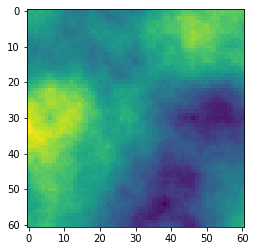

In [134]:
import numpy as np
plt.imshow(Z)


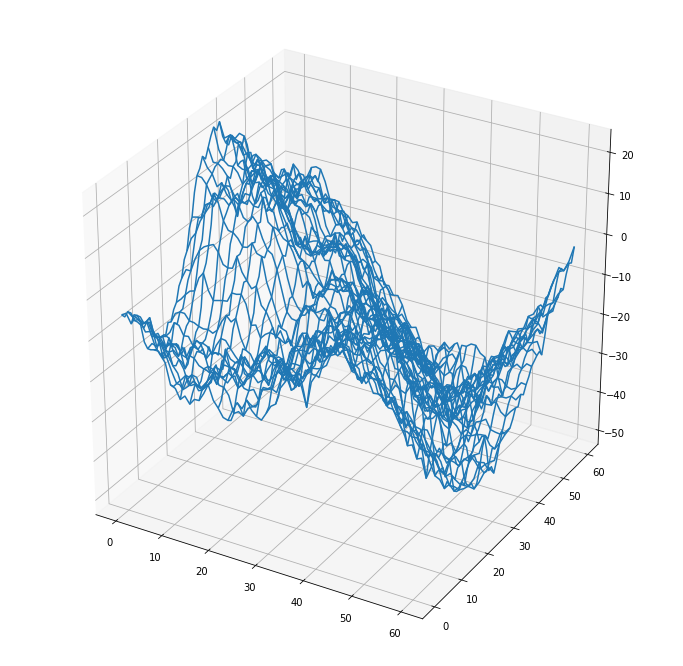

In [135]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(n)
y = np.arange(n)
X, Y = np.meshgrid(x,y)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

plt.show()

## Add an additional smoothing step (resembling erosion)

In [136]:
import scipy.ndimage as ndimage

In [137]:
ndiamge?

Object `ndiamge` not found.


In [138]:
Z_smooth = ndimage.gaussian_filter(Z, 1)

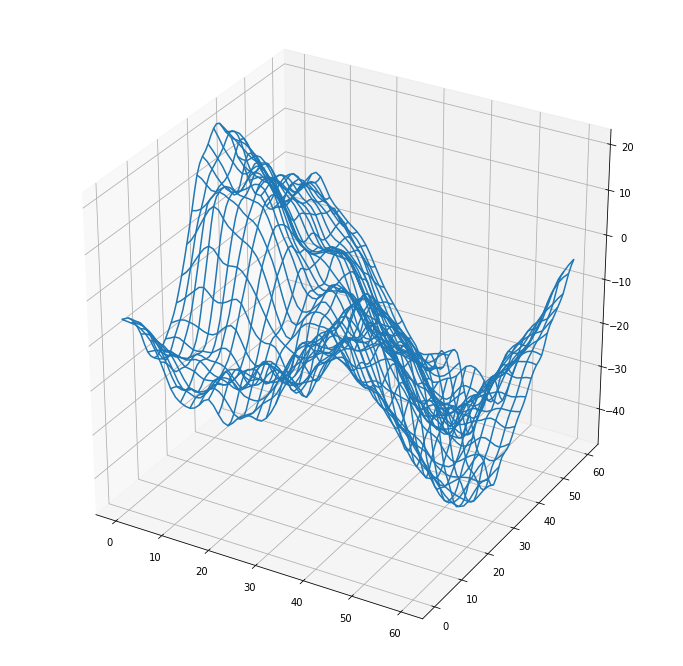

In [139]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(n)
y = np.arange(n)
X, Y = np.meshgrid(x,y)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z_smooth, rstride=2, cstride=2)

plt.show()

In [141]:
np.random.uniform(-2, 2, 2)

array([0.52143199, 1.40251461])